In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chess
import tensorflow as tf
import tensorflow.keras as keras


In [3]:
data = pd.read_csv('lichess_db_puzzle.csv', names=['PuzzleId', 'FEN', 'Moves', 'Rating', 'RatingDeviation', 'Popularity', 'NbPlays', 'Themes', 'GameUrl'])

In [4]:
data.head()

PuzzleId  ...                                GameUrl
0    00008  ...  https://lichess.org/787zsVup/black#48
1    0000D  ...        https://lichess.org/F8M8OS71#53
2    0009B  ...  https://lichess.org/4MWQCxQ6/black#32
3    000aY  ...        https://lichess.org/iihZGl6t#29
4    000hf  ...  https://lichess.org/71ygsFeE/black#38

[5 rows x 9 columns]

In [4]:
board = chess.Board(data.FEN[0])

In [6]:
for move in board.legal_moves:
    print(move)

a8g8
a8f8
a8e8
a8d8
a8c8
a8b8
e7e8
e7g7
e7f7
e7d7
e7c7
e7e6
f2b6
f2c5
f2d4
f2g3
f2e3
f2g1
f2e1
b2e5
b2d4
b2c3
b2b3
b2a3
b2c2
b2a2
b2c1
b2b1
b2a1
b7b6
a7a6
f6f5
d5d4
b7b5
a7a5


In [32]:
list(data.FEN[0].split()[0].split()[0].split('/')[0])

['r', '6', 'k']

In [37]:
data.Moves[1].split()

['d3d6', 'f8d8', 'd6d8', 'f6d8']

In [34]:
from fenpreprocessing import fen_to_array

fen_to_array(data.FEN[1])

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 

In [20]:
chess.BB_CENTER

103481868288

In [9]:
board.push_uci('f2g3')

Move.from_uci('f2g3')

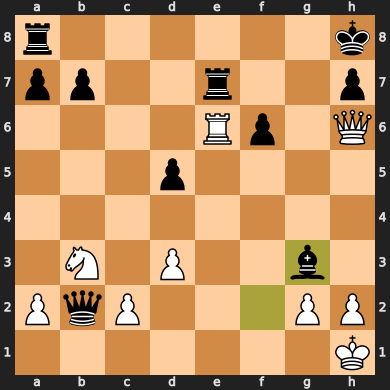

In [10]:
board

In [13]:
len(list(board.legal_moves))

39

In [14]:
board.board_fen()

'r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2b1/PqP3PP/7K'

In [15]:
data.FEN[0]

'r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - - 0 24'

In [2]:
from fenpreprocessing import possible_moves, make_converted_file

temp_df = pd.read_csv('fens/train.csv', nrows=1000)
# temp_df.to_csv('toy_file.csv', index=False)

tester = temp_df.apply(possible_moves, axis=1)
kludge_df = pd.concat(tester.values, ignore_index=True)

In [3]:
make_converted_file('toy_file.csv', 'toy_test.csv')

In [12]:
test_kludge = pd.read_csv('toy_test.csv', converters={'Position': lambda x: np.array(x)})

In [3]:
temp_df

FEN target_move
0  1r1q1rk1/p3R1bp/2pN2p1/2Pp1bQ1/1P1p4/6P1/P4PBP...        g7f6
1  r5k1/pp1b2b1/nqpp2pp/3PN3/1P2P3/P1N1n1QP/2PBB1...        e2f1
2  2rq1rk1/R4pp1/1p2p2p/1Pb3N1/5B2/4P1P1/1Q3KBP/8...        g5e6
3  rnbq1rk1/4bppp/p2p1n2/1p1Bp1B1/4P3/1NN2Q2/PPP2...        f6d5
4  6r1/4rp1k/b4qpp/P1Ppn3/1p6/1N2R1Q1/2B3PP/4R1K1...        e3e5
5  r4rk1/1p3p1p/p2R1p2/2p1p3/4P1P1/1b3N1P/1qPK1PB...        a8d8
6  r1b1r1k1/p2n1pp1/2Qb1q1p/1p6/3pP3/3B1N2/PP2NPP...        d6h2
7  r1bqrbk1/1p1n2p1/p3pp2/2ppP2Q/5B1P/2P1PN2/PP3P...        f3g5
8  8/4kp2/4p3/2p1r2p/2Pp2pP/R7/5PPK/2Q1q3 w - - 1 36        a3a7
9  6k1/5p2/5Pp1/p1b1P3/2R4P/r2p4/K2B1P2/8 w - - 2 46        a2b2

In [4]:
test_board = chess.Board(temp_df.FEN[0])

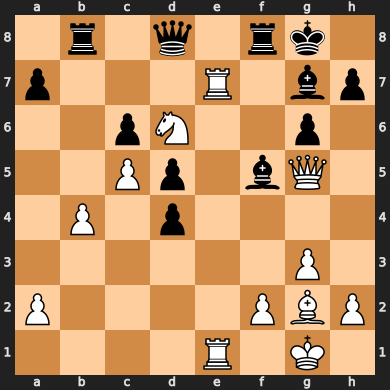

In [5]:
test_board

In [9]:
for move in test_board.legal_moves:
    print(move)


g8h8
f8e8
f8f7
f8f6
d8e8
d8c8
d8e7
d8d7
d8c7
d8d6
d8b6
d8a5
b8c8
b8a8
b8b7
b8b6
b8b5
b8b4
g7h8
g7h6
g7f6
g7e5
f5c8
f5d7
f5e6
f5g4
f5e4
f5h3
f5d3
f5c2
f5b1
h7h6
a7a6
d4d3
h7h5
a7a5
